In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import misc
from scipy.ndimage import zoom
from tqdm import tqdm_notebook
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm_notebook




%matplotlib inline

Using TensorFlow backend.


In [2]:
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)
target_dict = {
    'one': 0,
    'two': 1,
    'three': 2,
    'four': 3,
    'five': 4,
    'six': 5,
    'seven': 6,
    'eight': 7
}

In [3]:
df = pd.read_csv('img_data.csv', index_col=0)

In [4]:
target = df['target'].map(target_dict).values
data = df.loc[:, df.columns != 'target'].values.reshape((-1, img_rows, img_cols))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=9)

In [24]:
Y_train = np_utils.to_categorical(y_train, 8)
Y_test = np_utils.to_categorical(y_test, 8)

In [45]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')


test_datagen = ImageDataGenerator(        
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [46]:
train_generator = train_datagen.flow(X_train.reshape(-1, 100, 100, 1), Y_train, batch_size=32)

validation_generator = test_datagen.flow(X_test.reshape(-1, 100, 100, 1), Y_test, batch_size=32)

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('sigmoid'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=400*0.8 // 32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=400*0.2 // 32)

Epoch 1/500
10/10 [==============================] - 18s 2s/step - loss: 2.0960 - acc: 0.1250 - val_loss: 2.0846 - val_acc: 0.0625
Epoch 2/500
10/10 [==============================] - 12s 1s/step - loss: 2.0806 - acc: 0.1281 - val_loss: 2.0801 - val_acc: 0.0625
Epoch 3/500
10/10 [==============================] - 12s 1s/step - loss: 2.0793 - acc: 0.1281 - val_loss: 2.0806 - val_acc: 0.0625
Epoch 4/500
10/10 [==============================] - 11s 1s/step - loss: 2.0790 - acc: 0.1469 - val_loss: 2.0846 - val_acc: 0.0625
Epoch 5/500
10/10 [==============================] - 12s 1s/step - loss: 2.0751 - acc: 0.1469 - val_loss: 2.0891 - val_acc: 0.1094
Epoch 6/500
10/10 [==============================] - 11s 1s/step - loss: 2.0773 - acc: 0.1594 - val_loss: 2.0850 - val_acc: 0.0781
Epoch 7/500
10/10 [==============================] - 11s 1s/step - loss: 2.0709 - acc: 0.1375 - val_loss: 2.0948 - val_acc: 0.0625
Epoch 8/500
10/10 [==============================] - 12s 1s/step - loss: 2.0715 - a

10/10 [==============================] - 12s 1s/step - loss: 1.1985 - acc: 0.5312 - val_loss: 0.9010 - val_acc: 0.7188
Epoch 64/500
10/10 [==============================] - 11s 1s/step - loss: 1.1264 - acc: 0.5906 - val_loss: 0.9012 - val_acc: 0.6875
Epoch 65/500
10/10 [==============================] - 12s 1s/step - loss: 1.0173 - acc: 0.6031 - val_loss: 0.9167 - val_acc: 0.6719
Epoch 66/500
10/10 [==============================] - 11s 1s/step - loss: 1.1050 - acc: 0.5844 - val_loss: 0.8690 - val_acc: 0.7500
Epoch 67/500
10/10 [==============================] - 11s 1s/step - loss: 1.1290 - acc: 0.5563 - val_loss: 0.8627 - val_acc: 0.6875
Epoch 68/500
10/10 [==============================] - 11s 1s/step - loss: 1.0441 - acc: 0.6125 - val_loss: 0.8903 - val_acc: 0.6875
Epoch 69/500
10/10 [==============================] - 12s 1s/step - loss: 1.0265 - acc: 0.6094 - val_loss: 0.8666 - val_acc: 0.7188
Epoch 70/500
10/10 [==============================] - 11s 1s/step - loss: 1.0397 - acc: 0

Epoch 125/500
10/10 [==============================] - 12s 1s/step - loss: 0.7491 - acc: 0.7250 - val_loss: 0.5254 - val_acc: 0.7656
Epoch 126/500
10/10 [==============================] - 11s 1s/step - loss: 0.7394 - acc: 0.7062 - val_loss: 0.5735 - val_acc: 0.7812
Epoch 127/500
10/10 [==============================] - 11s 1s/step - loss: 0.7901 - acc: 0.6781 - val_loss: 0.5219 - val_acc: 0.8438
Epoch 128/500
10/10 [==============================] - 11s 1s/step - loss: 0.7114 - acc: 0.7438 - val_loss: 0.5031 - val_acc: 0.8125
Epoch 129/500
10/10 [==============================] - 12s 1s/step - loss: 0.6458 - acc: 0.7562 - val_loss: 0.5191 - val_acc: 0.8594
Epoch 130/500
10/10 [==============================] - 12s 1s/step - loss: 0.6850 - acc: 0.7406 - val_loss: 0.4354 - val_acc: 0.8281
Epoch 131/500
10/10 [==============================] - 11s 1s/step - loss: 0.6356 - acc: 0.7781 - val_loss: 0.3905 - val_acc: 0.8750
Epoch 132/500
10/10 [==============================] - 12s 1s/step - 

10/10 [==============================] - 11s 1s/step - loss: 0.6447 - acc: 0.7406 - val_loss: 0.4354 - val_acc: 0.8125
Epoch 187/500
10/10 [==============================] - 11s 1s/step - loss: 0.6280 - acc: 0.7406 - val_loss: 0.3837 - val_acc: 0.8750
Epoch 188/500
10/10 [==============================] - 12s 1s/step - loss: 0.5364 - acc: 0.7844 - val_loss: 0.4506 - val_acc: 0.8281
Epoch 189/500
10/10 [==============================] - 11s 1s/step - loss: 0.6103 - acc: 0.7562 - val_loss: 0.4331 - val_acc: 0.8438
Epoch 190/500
10/10 [==============================] - 12s 1s/step - loss: 0.5047 - acc: 0.8031 - val_loss: 0.3260 - val_acc: 0.8906
Epoch 191/500
10/10 [==============================] - 12s 1s/step - loss: 0.6706 - acc: 0.7438 - val_loss: 0.5779 - val_acc: 0.7500
Epoch 192/500
10/10 [==============================] - 11s 1s/step - loss: 0.6390 - acc: 0.7562 - val_loss: 0.3194 - val_acc: 0.9062
Epoch 193/500
10/10 [==============================] - 11s 1s/step - loss: 0.5419 -

Epoch 248/500
10/10 [==============================] - 11s 1s/step - loss: 0.4736 - acc: 0.8156 - val_loss: 0.2853 - val_acc: 0.9375
Epoch 249/500
10/10 [==============================] - 11s 1s/step - loss: 0.5479 - acc: 0.7844 - val_loss: 0.2872 - val_acc: 0.9062
Epoch 250/500
10/10 [==============================] - 11s 1s/step - loss: 0.5276 - acc: 0.8031 - val_loss: 0.2669 - val_acc: 0.9219
Epoch 251/500
10/10 [==============================] - 11s 1s/step - loss: 0.5055 - acc: 0.8156 - val_loss: 0.3195 - val_acc: 0.8906
Epoch 252/500
10/10 [==============================] - 11s 1s/step - loss: 0.5075 - acc: 0.8125 - val_loss: 0.3552 - val_acc: 0.8750
Epoch 253/500
10/10 [==============================] - 11s 1s/step - loss: 0.5010 - acc: 0.8063 - val_loss: 0.3256 - val_acc: 0.9219
Epoch 254/500
10/10 [==============================] - 11s 1s/step - loss: 0.5422 - acc: 0.7750 - val_loss: 0.2350 - val_acc: 0.9375
Epoch 255/500
10/10 [==============================] - 11s 1s/step - 

10/10 [==============================] - 12s 1s/step - loss: 0.4774 - acc: 0.8031 - val_loss: 0.3238 - val_acc: 0.8594
Epoch 310/500
10/10 [==============================] - 11s 1s/step - loss: 0.5628 - acc: 0.7937 - val_loss: 0.3258 - val_acc: 0.8750
Epoch 311/500
10/10 [==============================] - 11s 1s/step - loss: 0.5129 - acc: 0.7906 - val_loss: 0.2234 - val_acc: 0.9375
Epoch 312/500
10/10 [==============================] - 11s 1s/step - loss: 0.4628 - acc: 0.8000 - val_loss: 0.5100 - val_acc: 0.8594
Epoch 313/500
10/10 [==============================] - 11s 1s/step - loss: 0.3994 - acc: 0.8281 - val_loss: 0.2126 - val_acc: 0.9219
Epoch 314/500
10/10 [==============================] - 11s 1s/step - loss: 0.4438 - acc: 0.8187 - val_loss: 0.3649 - val_acc: 0.9062
Epoch 315/500
10/10 [==============================] - 11s 1s/step - loss: 0.4388 - acc: 0.8281 - val_loss: 0.2356 - val_acc: 0.8906
Epoch 316/500
10/10 [==============================] - 11s 1s/step - loss: 0.4280 -

Epoch 371/500
10/10 [==============================] - 11s 1s/step - loss: 0.4140 - acc: 0.8594 - val_loss: 0.4257 - val_acc: 0.8438
Epoch 372/500
10/10 [==============================] - 11s 1s/step - loss: 0.4568 - acc: 0.8375 - val_loss: 0.1811 - val_acc: 0.9219
Epoch 373/500
10/10 [==============================] - 12s 1s/step - loss: 0.4336 - acc: 0.8031 - val_loss: 0.3512 - val_acc: 0.9062
Epoch 374/500
10/10 [==============================] - 11s 1s/step - loss: 0.4340 - acc: 0.8219 - val_loss: 0.2283 - val_acc: 0.9062
Epoch 375/500
10/10 [==============================] - 11s 1s/step - loss: 0.3626 - acc: 0.8469 - val_loss: 0.2678 - val_acc: 0.9219
Epoch 376/500
10/10 [==============================] - 11s 1s/step - loss: 0.3791 - acc: 0.8562 - val_loss: 0.1635 - val_acc: 0.9531
Epoch 377/500
10/10 [==============================] - 11s 1s/step - loss: 0.4486 - acc: 0.8094 - val_loss: 0.3980 - val_acc: 0.9062
Epoch 378/500
10/10 [==============================] - 11s 1s/step - 

10/10 [==============================] - 11s 1s/step - loss: 0.4171 - acc: 0.8156 - val_loss: 0.3701 - val_acc: 0.8750
Epoch 433/500
10/10 [==============================] - 11s 1s/step - loss: 0.3684 - acc: 0.8500 - val_loss: 0.3080 - val_acc: 0.8750
Epoch 434/500
10/10 [==============================] - 12s 1s/step - loss: 0.4226 - acc: 0.8313 - val_loss: 0.2336 - val_acc: 0.9375
Epoch 435/500
10/10 [==============================] - 11s 1s/step - loss: 0.3825 - acc: 0.8250 - val_loss: 0.3857 - val_acc: 0.8750
Epoch 436/500
10/10 [==============================] - 11s 1s/step - loss: 0.4128 - acc: 0.8063 - val_loss: 0.1771 - val_acc: 0.9219
Epoch 437/500
10/10 [==============================] - 11s 1s/step - loss: 0.3761 - acc: 0.8344 - val_loss: 0.2304 - val_acc: 0.9531
Epoch 438/500
10/10 [==============================] - 12s 1s/step - loss: 0.3669 - acc: 0.8594 - val_loss: 0.2104 - val_acc: 0.9219
Epoch 439/500
10/10 [==============================] - 11s 1s/step - loss: 0.4814 -

Epoch 494/500
10/10 [==============================] - 15s 2s/step - loss: 0.4180 - acc: 0.8156 - val_loss: 0.3295 - val_acc: 0.8906
Epoch 495/500
10/10 [==============================] - 15s 2s/step - loss: 0.4059 - acc: 0.8125 - val_loss: 0.3761 - val_acc: 0.8906
Epoch 496/500
10/10 [==============================] - 12s 1s/step - loss: 0.3492 - acc: 0.8844 - val_loss: 0.2797 - val_acc: 0.8594
Epoch 497/500
10/10 [==============================] - 15s 2s/step - loss: 0.3836 - acc: 0.8438 - val_loss: 0.1831 - val_acc: 0.9375
Epoch 498/500
10/10 [==============================] - 12s 1s/step - loss: 0.4555 - acc: 0.8094 - val_loss: 0.2050 - val_acc: 0.9219
Epoch 499/500
10/10 [==============================] - 12s 1s/step - loss: 0.3550 - acc: 0.8594 - val_loss: 0.2171 - val_acc: 0.8594
Epoch 500/500
10/10 [==============================] - 11s 1s/step - loss: 0.4065 - acc: 0.8469 - val_loss: 0.1932 - val_acc: 0.9375


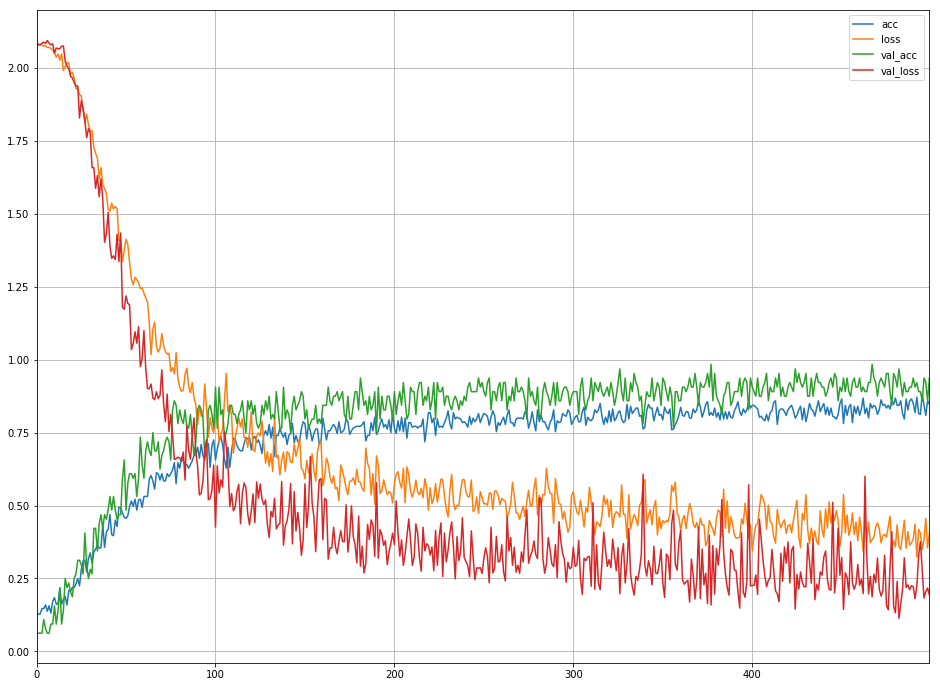

In [68]:
pd.DataFrame(history.history).plot(grid=True, figsize=(16, 12));

In [ ]:
!